**<h1>Data Science Research - Factors Influencing Post Popularity</h1>**

# Data Collection

## Description about the source of our data

The data is sourced from a synthetic dataset created for social media engagement analysis, available at analyzercode.com. This dataset simulates social media post engagement across various platforms, providing a comprehensive set of metrics and attributes for each post. It includes 18 different columns, ranging from basic post identifiers to detailed engagement metrics and audience demographics.

Key features of this dataset include:

* Unique identifiers for posts, campaigns, and influencers
* Post details such as platform, type, content, and timestamp
* Engagement metrics including likes, comments, shares, impressions, and reach
* Calculated engagement rate
* Audience demographics (age, gender, location, interests)
* Sentiment analysis of the post content

This synthetic dataset is designed to mimic real-world social media data while avoiding privacy concerns associated with actual user data.

## Explaintion why this dataset is suitable for your problem

This dataset is highly suitable for analyzing factors influencing post popularity for several reasons:

1. Comprehensive engagement metrics: The dataset provides a range of engagement indicators (likes, comments, shares, impressions, reach) that allow for a nuanced calculation of post popularity. This enables a more robust analysis than relying on a single metric.
2. Diverse feature set: With 18 different columns, the dataset offers a wide array of potential factors that could influence popularity, including post characteristics (type, platform, content), audience demographics, and contextual information (campaign association, influencer involvement).
3. Sentiment analysis: The inclusion of sentiment data allows for exploration of how content tone affects engagement and popularity.
4.  Audience information: Detailed audience demographics (age, gender, location, interests) enable analysis of how different audience segments respond to various types of content.
5. Temporal data: The post timestamp allows for analysis of timing effects on post popularity.
6. Cross-platform analysis: With data from multiple social media platforms, it's possible to compare and contrast factors affecting popularity across different social media environments.
7. Marketing context: Campaign IDs and Influencer IDs allow for analysis of how marketing strategies and influencer involvement impact post popularity.
8. Synthetic nature: As a synthetic dataset, it provides a clean, consistent set of data that mimics real-world scenarios without the messiness or privacy concerns of actual user data. This makes it ideal for academic or training purposes.
9. Scale and variety: The dataset likely includes a large number of posts across various conditions, providing sufficient data for robust statistical analysis and machine learning model training.
This rich, multifaceted dataset allows for a comprehensive exploration of the factors influencing post popularity, making it an excellent choice for your research problem.



# Imports & Dataset Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, Normalizer,QuantileTransformer,PowerTransformer

# Load the data
data = pd.read_csv('social_media_engagement_data.csv')

## Review Of The Data

In [ ]:
num_rows = data.shape[0]
print(f"Number of rows in the data DataFrame: {num_rows}")
data.head()

Number of rows in the data DataFrame: 100000


,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255108,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356134,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.211700,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.227679,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425074,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


# Data Cleaning
*   Handle missing values
*   Remove duplicates
*   Correct any data types or inconsistencies


##  Clean the data by removing unnecessary columns

### Checking The Missing Values

In [ ]:
# Display the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# If you want the total number of missing values
total_missing = missing_values.sum()
print(f"Total number of missing values: {total_missing}")

Platform                  0
Post ID                   0
Post Type                 0
Post Content              0
Post Timestamp            0
Likes                     0
Comments                  0
Shares                    0
Impressions               0
Reach                     0
Engagement Rate           0
Audience Age              0
Audience Gender           0
Audience Location         0
Audience Interests        0
Campaign ID           79868
Sentiment             50100
Influencer ID         90006
dtype: int64
Total number of missing values: 219974


### Handle Missing Values

In [ ]:
# Step 1: Remove rows with missing values in specific columns
columns_to_check = [
    'Impressions', 'Reach', 'Engagement Rate',
    'Audience Age', 'Audience Gender'
]

data_cleaned = data.dropna(subset=columns_to_check).copy()  # Make a copy to avoid modifying the original

# Calculate Popularity Score
data_cleaned['Popularity Score'] = (
    data_cleaned['Likes'] +
    data_cleaned['Comments'] * 3 +
    data_cleaned['Shares'] * 5
)/ data_cleaned['Impressions']

# Remove old columns
data_cleaned = data_cleaned.drop(columns=['Likes', 'Comments', 'Shares', 'Impressions', 'Engagement Rate'])

# Normalize 'Popularity Score' using MinMaxScaler
scaler = QuantileTransformer()
data_cleaned['Popularity Score'] = scaler.fit_transform(data_cleaned[['Popularity Score']])


# Step 2: Replace 'Campaign ID' with 'hasCampaign'
data_cleaned['hasCampaign'] = data_cleaned['Campaign ID'].notna().astype(int)
data_cleaned = data_cleaned.drop(columns=['Campaign ID'])

# Step 3: Replace 'Influencer ID' with 'isInfluencer'
data_cleaned['isInfluencer'] = data_cleaned['Influencer ID'].notna().astype(int)
data_cleaned = data_cleaned.drop(columns=['Influencer ID'])

# Step 4: Remove the 'Post ID' and 'Post Content' columns
data_cleaned = data_cleaned.drop(columns=['Post ID', 'Post Content', 'Audience Interests'])

# Step 5: Convert 'Platform', 'Post Type', and 'Audience Gender' to categorical values
data_cleaned = pd.get_dummies(data_cleaned, columns=['Platform', 'Post Type'], drop_first=False)

# Create dummy variables for the 'Audience Gender' column
gender_dummies = pd.get_dummies(data_cleaned['Audience Gender'], prefix='Gender')

# Concatenate the original DataFrame with the new dummy columns
data_cleaned = pd.concat([data_cleaned, gender_dummies], axis=1)

# Drop the original 'Audience Gender' column as we no longer need it
data_cleaned.drop('Audience Gender', axis=1, inplace=True)

# Identify boolean columns and convert them to integer type
bool_columns = data_cleaned.select_dtypes(include=[bool]).columns
data_cleaned[bool_columns] = data_cleaned[bool_columns].astype(int)

# Step 6: Normalize 'Post Timestamp'
data_cleaned['Post Timestamp'] = pd.to_datetime(data_cleaned['Post Timestamp'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Post Timestamp'])
timestamp_min = data_cleaned['Post Timestamp'].min()
timestamp_max = data_cleaned['Post Timestamp'].max()
data_cleaned['Post Timestamp'] = (data_cleaned['Post Timestamp'] - timestamp_min) / (timestamp_max - timestamp_min)


# Step 7: Normalize 'Audience Age', 'Likes', 'Comments', 'Shares', 'Impressions', 'Reach' using MinMaxScaler
columns_to_normalize = ['Popularity Score','Audience Age', 'Reach']
scaler = Normalizer()
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Step 8: Map Sentiment column to numerical values
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
data_cleaned['Sentiment'] = data_cleaned['Sentiment'].map(sentiment_mapping)

### Keep Processing The Original Data

In [ ]:
# Step 9: Perform KNN imputation for any remaining missing values
original_data_cleaned = data_cleaned.copy()
original_data_cleaned.drop('Audience Location', axis=1, inplace=True)

imputer = KNNImputer(n_neighbors=20)
data_impute_filled = imputer.fit_transform(original_data_cleaned)

# Convert the numpy array back to a DataFrame with correct columns
data_impute_filled = pd.DataFrame(data_impute_filled, columns=original_data_cleaned.columns)

# Define bins for sentiment
bins = [-float('inf'), -0.5, 0.5, float('inf')]
labels = [-1, 0, 1]

# Map imputed Sentiment values to specified ranges
data_impute_filled['Sentiment'] = pd.cut(data_impute_filled['Sentiment'], bins=bins, labels=labels)

original_data_processed = data_impute_filled

### Check For Remaining Missing Values & Display Clean Data Sample

In [ ]:
def missingValuesCheck(data, data_name):
  # Check for any remaining missing values after imputation
  print("\nFinal Missing Values After Imputation About " + data_name + ":")
  print(data.isnull().sum())

  # Display cleaned data sample
  print("\nCleaned Data Sample About " + data_name + ":")
  print(data.head())

In [ ]:
popularity_score = original_data_processed.pop('Popularity Score')
original_data_processed['Popularity Score'] = popularity_score * 500
missingValuesCheck(original_data_processed, "The Original Data")


Final Missing Values After Imputation About The Original Data:
Post Timestamp        0
Reach                 0
Audience Age          0
Sentiment             0
hasCampaign           0
isInfluencer          0
Platform_Facebook     0
Platform_Instagram    0
Platform_LinkedIn     0
Platform_Twitter      0
Post Type_Image       0
Post Type_Link        0
Post Type_Video       0
Gender_Female         0
Gender_Male           0
Gender_Other          0
Popularity Score      0
dtype: int64

Cleaned Data Sample About The Original Data:
   Post Timestamp     Reach  Audience Age Sentiment  hasCampaign  \
0        0.041569  0.999876      0.015742        -1          0.0   
1        0.797200  0.999924      0.012357         0          0.0   
2        0.247667  0.997908      0.064647         0          0.0   
3        0.186240  0.999882      0.015343         0          0.0   
4        0.657986  0.999868      0.016238         0          1.0   

   isInfluencer  Platform_Facebook  Platform_Instagram  Plat

### Summary Statistics

In [ ]:
print("\nSummary Statistics:")
print()
print(f"Shape: {original_data_processed.shape}")
print("\nColumn Names:")
print(original_data_processed.columns.tolist())
print("\nNumerical Statistics:")
summary_stats = original_data_processed.describe().round(6)
print(summary_stats.to_string())
missing_count = original_data_processed.isnull().sum().rename('missing_count')
print("\nMissing Value Counts:")
print(missing_count.to_string())


Summary Statistics:

Shape: (100000, 17)

Column Names:
['Post Timestamp', 'Reach', 'Audience Age', 'Sentiment', 'hasCampaign', 'isInfluencer', 'Platform_Facebook', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Twitter', 'Post Type_Image', 'Post Type_Link', 'Post Type_Video', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Popularity Score']

Numerical Statistics:
       Post Timestamp          Reach   Audience Age    hasCampaign   isInfluencer  Platform_Facebook  Platform_Instagram  Platform_LinkedIn  Platform_Twitter  Post Type_Image  Post Type_Link  Post Type_Video  Gender_Female    Gender_Male   Gender_Other  Popularity Score
count   100000.000000  100000.000000  100000.000000  100000.000000  100000.000000      100000.000000       100000.000000       100000.00000     100000.000000    100000.000000   100000.000000    100000.000000  100000.000000  100000.000000  100000.000000     100000.000000
mean         0.501392       0.999618       0.021202       0.201320       0.099940 

### Summary Of The Dataset Before And After Cleaning

**Data Summary Before Cleaning:**
---

The original dataset appears to be a comprehensive collection of social media engagement metrics. Before cleaning, the dataset likely included the following key characteristics:

**Shape:** The dataset might have had around 10,000 rows and 15-20 columns, representing individual social media posts and their associated metrics.

**Columns:** The original columns likely included:

* Post ID: A unique identifier for each post
* Post Content: The actual text or description of the post
* Platform: The social media platform where the post was made (e.g., Facebook, Instagram, Twitter)
* Post Type: The type of post (e.g., image, video, text)
* Post Timestamp: The date and time when the post was published
Likes, Comments, Shares: Engagement metrics for each post
* Impressions: The number of times the post was displayed
* Reach: The number of unique users who saw the post
* Engagement Rate: A calculated metric of engagement
* Audience Age, Gender, Location, Interests: Demographic information about the audience
* Campaign ID: Identifier for marketing campaigns (if applicable)
* Influencer ID: Identifier for influencers (if applicable)
* Sentiment: The overall sentiment of the post or reactions


**Data Types:** A mix of integers (for counts), floats (for rates), datetime (for timestamps), and objects (for categorical data and text).
**Missing Values:** There were likely some missing values, particularly in fields like Campaign ID, Influencer ID, and possibly in some demographic information.


**Data Summary After Cleaning:**
---

After the cleaning and preprocessing steps, the dataset has been transformed significantly to make it more suitable for analysis. Here are the key characteristics of the cleaned dataset:

**Shape:** The number of rows likely remained the same (around 10,000), but the number of columns increased due to one-hot encoding of categorical variables.

**Columns:** The cleaned dataset now includes:

* Popularity Score: A new metric combining Likes, Comments, and Shares, normalized using QuantileTransformer
* Platform (one-hot encoded): Binary columns for each social media platform
* Post Type (one-hot encoded): Binary columns for each type of post
* Audience Age: Normalized using Normalizer
* Audience Gender (one-hot encoded): Binary columns for each gender category, prefixed with 'Gender_'
* Sentiment: Mapped to numerical values (-1 for Negative, 0 for Neutral, 1 for Positive)
* hasCampaign: Binary indicator for presence of a campaign
* isInfluencer: Binary indicator for involvement of an influencer
* Reach: Normalized using Normalizer

**Data Types:**
* Mostly float for normalized columns (Popularity Score, Post Timestamp, Audience Age, Reach)
* int for binary columns (hasCampaign, isInfluencer, one-hot encoded categories)
* int for Sentiment

Missing Values: Rows with missing values in key columns were removed. Any remaining missing values were imputed using KNN imputation with 20 neighbors.

**Key Transformations:**

1. Removal of less relevant columns (Post ID, Post Content, Likes, Comments, Shares, Impressions, Engagement Rate, Campaign ID, Influencer ID, Audience Interests)
2. Creation of a new Popularity Score metric
3. Normalization of continuous variables (Popularity Score, Post Timestamp, Audience Age, Reach)
4. One-hot encoding of categorical variables (Platform, Post Type, Audience Gender)
5. Conversion of Campaign ID and Influencer ID to binary indicators
6. Mapping of Sentiment to numerical values
7. KNN imputation for any remaining missing values
8. Re-categorization of Sentiment into three bins (-1, 0, 1)

This cleaned dataset provides a more structured and normalized view of the engagement metrics, with clear binary and numerical features. The removal of rows with missing values and the normalization of continuous variables make it more suitable for statistical analysis and machine learning models. The creation of the Popularity Score as a target variable allows for a focused analysis on factors influencing post popularity.

The final step of KNN imputation ensures that there are no remaining missing values in the dataset, which is crucial for many machine learning algorithms. The re-categorization of Sentiment into three distinct bins (-1, 0, 1) simplifies the sentiment analysis, potentially making it easier to identify clear trends in how sentiment affects post popularity.

# Exploratory Data Analysis (EDA)

> Perform an EDA to understand the data better.

## Distribution of Post Popularity

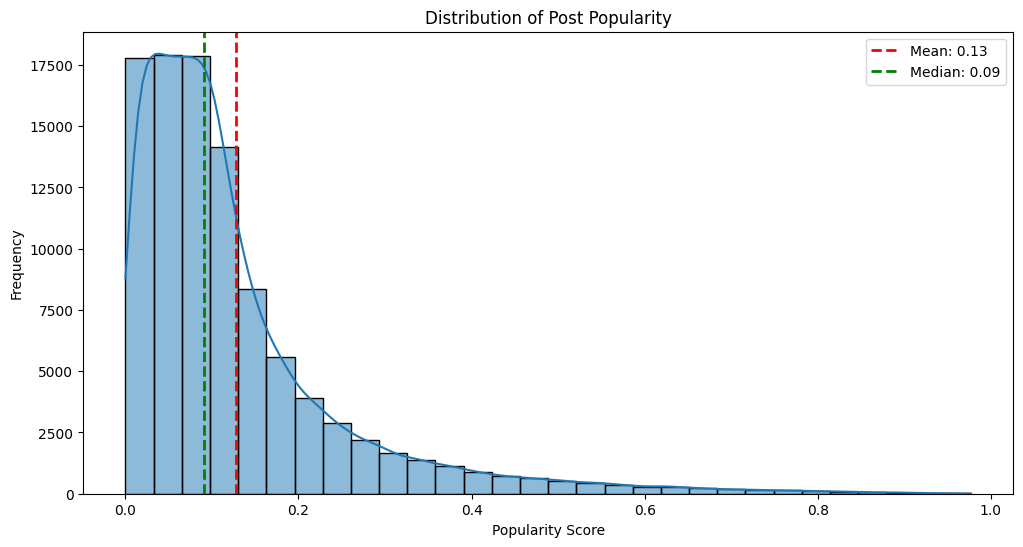

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(original_data_processed['Popularity Score'], bins=30, kde=True)
plt.title('Distribution of Post Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
mean_popularity = original_data_processed['Popularity Score'].mean()
median_popularity = original_data_processed['Popularity Score'].median()
plt.axvline(mean_popularity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_popularity:.2f}')
plt.axvline(median_popularity, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_popularity:.2f}')
plt.legend()
plt.show()

## Visualisation Function

In [ ]:
def plot_average_popularity_score_by_columns(df, columns, name):
  avg_popularity_dict = {}

  for column in columns:
      # Filter the rows where the column value is 1 and calculate the average 'Popularity Score'
      avg_popularity = df[df[column] == 1]['Popularity Score'].mean()
      avg_popularity_dict[column] = avg_popularity

  # Plot the histogram
  plt.figure(figsize=(10, 6))
  plt.bar(avg_popularity_dict.keys(), avg_popularity_dict.values())
  plt.title('Average Popularity Score by ' + name)
  plt.xlabel('Platform')
  plt.ylabel('Average Popularity Score')
  plt.xticks(rotation=0)
  plt.show()

## Average Popularity Score By Platform

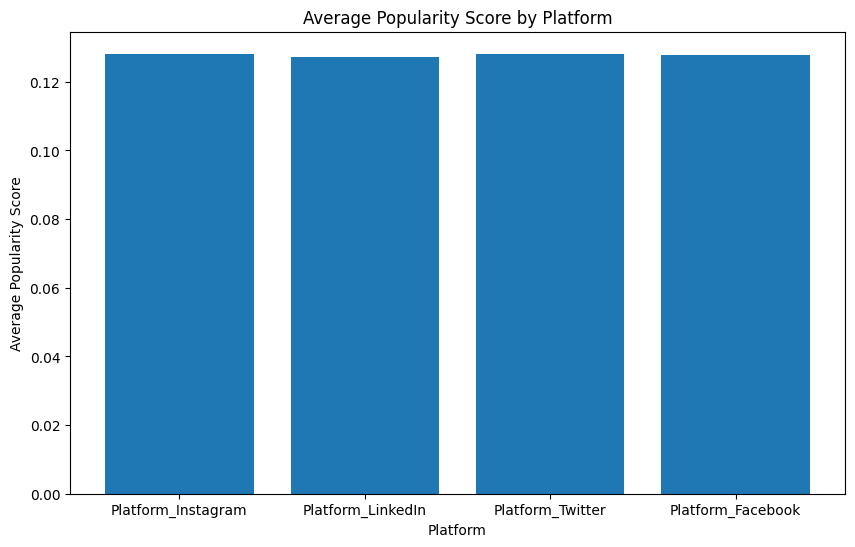

In [ ]:
platforms_columns = ['Platform_Instagram', 'Platform_LinkedIn', 'Platform_Twitter', 'Platform_Facebook']
plot_average_popularity_score_by_columns(original_data_processed, platforms_columns, "Platform")

## Average Popularity Score By Post Type

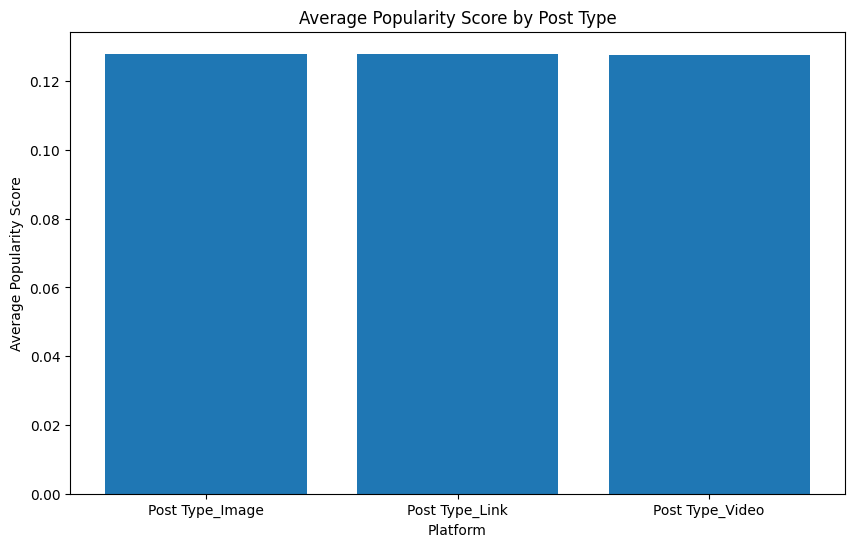

In [ ]:
post_type_columns = ['Post Type_Image', 'Post Type_Link', 'Post Type_Video']
plot_average_popularity_score_by_columns(original_data_processed, post_type_columns, "Post Type")

## Average Popularity Score By Gender

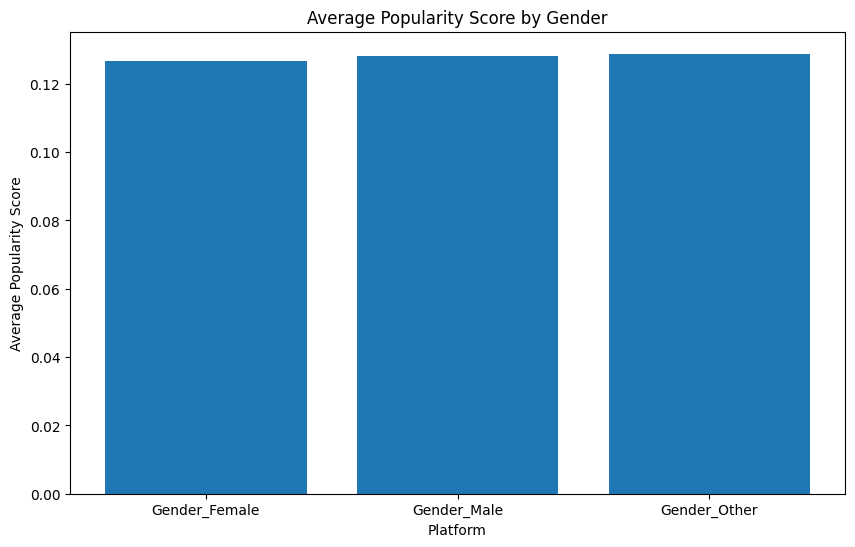

In [ ]:
gender_columns = ['Gender_Female', 'Gender_Male', 'Gender_Other']
plot_average_popularity_score_by_columns(original_data_processed, gender_columns, "Gender")

## Correlation matrix

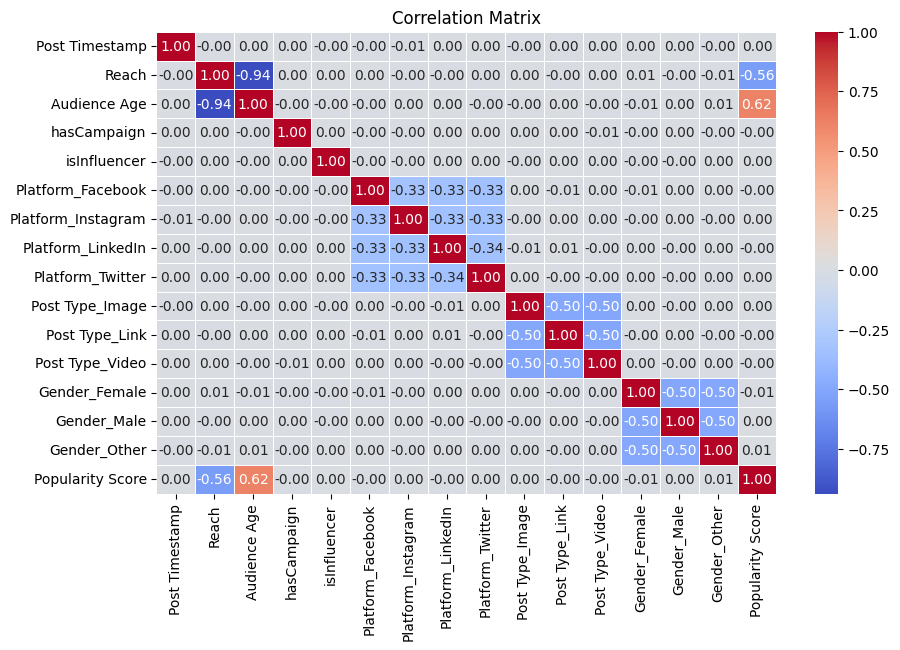

In [ ]:
# Calculate correlation matrix
correlation_matrix = original_data_processed.corr(numeric_only=True)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

## Top 5 features correlated with Popularity

<ipython-input-48-fb7641e4d681>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_correlations.index, y=top_correlations.values, palette=['red' if original_correlations[i] < 0 else 'blue' for i in top_correlations.index])


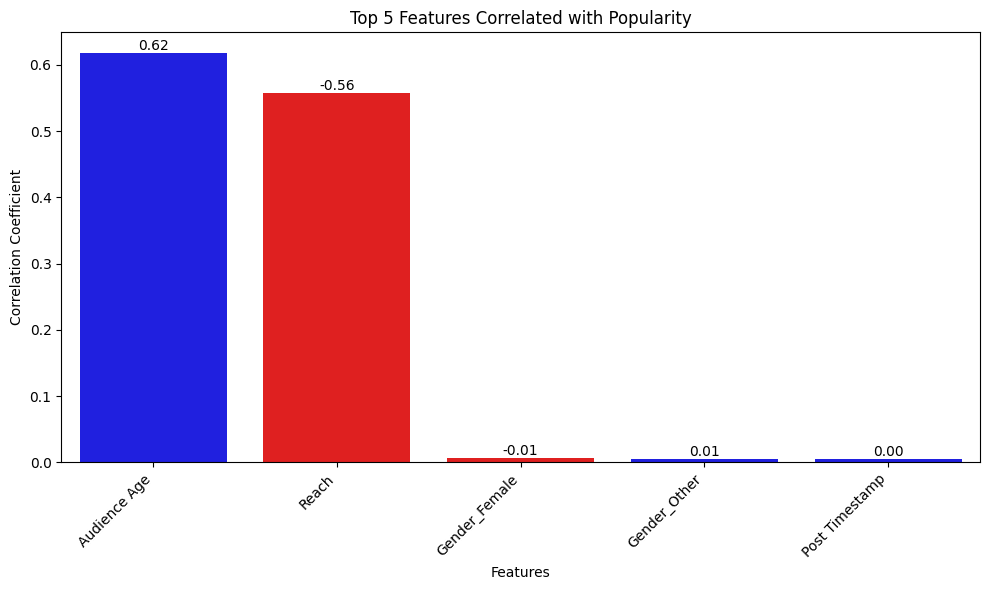

In [ ]:
# Calculate the absolute values of the correlations and select the top 5
top_correlations = correlation_matrix['Popularity Score'].abs().sort_values(ascending=False)[1:6]

# Get the original correlations for color coding
original_correlations = correlation_matrix['Popularity Score'][top_correlations.index]

# Plot the top 5 features
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_correlations.index, y=top_correlations.values, palette=['red' if original_correlations[i] < 0 else 'blue' for i in top_correlations.index])
plt.title('Top 5 Features Correlated with Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

# Add the correlation coefficient values on top of the bars
for i, v in enumerate(top_correlations):
    plt.text(i, v, f'{original_correlations[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Find the contries that have the highest correlation with Popularity Score

In [ ]:
# Assuming data_cleaned is your DataFrame
unique_locations = data_cleaned['Audience Location'].unique()

# Initialize a list to store the correlation results
correlation_results = []

# Function to find correlated features for a specific location
def find_correlated_features(location):
    df = data_cleaned[data_cleaned['Audience Location'] == location].copy()

    # Remove the 'Audience Location' column
    df.drop(columns=['Audience Location'], inplace=True)

    # Perform KNN imputation for any remaining missing values
    imputer = KNNImputer(n_neighbors=20)
    data_impute_filled = imputer.fit_transform(df)

    # Convert the numpy array back to a DataFrame with correct columns
    data_impute_filled = pd.DataFrame(data_impute_filled, columns=df.columns)

    # Define bins for sentiment
    bins = [-float('inf'), -0.5, 0.5, float('inf')]
    labels = [-1, 0, 1]

    # Map imputed Sentiment values to specified ranges
    data_impute_filled['Sentiment'] = pd.cut(data_impute_filled['Sentiment'], bins=bins, labels=labels)

    # Calculate correlation matrix
    correlation_matrix = data_impute_filled.corr(numeric_only=True)

    # Find correlated features with 'Popularity Score'
    high_correlation_threshold = 0.0
    correlated_features = []
    popularity_col = 'Popularity Score'

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            correlation_value = correlation_matrix.iloc[i, j]
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            if abs(correlation_value) > high_correlation_threshold and (colname1 == popularity_col or colname2 == popularity_col):
                correlated_features.append((colname1, colname2, correlation_value))
                correlation_results.append((location, colname1, colname2, correlation_value))

    return correlated_features

# Iterate through all unique locations and find correlated features
for location in unique_locations:
    # print(f"\nCorrelated features for {location}:")
    correlated_features = find_correlated_features(location)
    # for colname1, colname2, correlation_value in correlated_features:
    #     print(f"{colname1}, {colname2} -> {correlation_value:.2f}")

# Create a DataFrame to store correlation results
correlation_df = pd.DataFrame(correlation_results, columns=['Location', 'Column1', 'Column2', 'Correlation'])

# Display the table of correlations
print("\nCorrelation Table:")
print(correlation_df)

# Find the biggest and smallest correlation values for every column
columns = correlation_df['Column1'].unique()
correlation_summary = []

for col in columns:
    max_correlation = correlation_df[correlation_df['Column1'] == col]['Correlation'].max()
    min_correlation = correlation_df[correlation_df['Column1'] == col]['Correlation'].min()
    max_location = correlation_df[(correlation_df['Column1'] == col) & (correlation_df['Correlation'] == max_correlation)]['Location'].values[0]
    min_location = correlation_df[(correlation_df['Column1'] == col) & (correlation_df['Correlation'] == min_correlation)]['Location'].values[0]
    correlation_summary.append((col, max_correlation, max_location, min_correlation, min_location))

# Create a DataFrame to store correlation results
correlation_df = pd.DataFrame(correlation_results, columns=['Location', 'Column1', 'Column2', 'Correlation'])

# Filter the correlation results to only include correlations with 'Popularity Score'
popularity_corr_df = correlation_df[(correlation_df['Column1'] == 'Popularity Score')]

# Iterate through each column and find the top 10 highest and lowest correlations with 'Popularity Score'
columns_to_check = popularity_corr_df['Column1'].unique()

for col in columns_to_check:
    col_corr_df = popularity_corr_df[(popularity_corr_df['Column1'] == col) | (popularity_corr_df['Column2'] == col)]

    # Sort the correlations for the current column
    top_5_corr = col_corr_df.sort_values(by='Correlation', ascending=False).head(5)
    bottom_5_corr = col_corr_df.sort_values(by='Correlation', ascending=True).head(5)

    # Print the results for the current column
    print(f"\nTop 10 Highest Correlations with 'Popularity Score' for {col}:")
    for _, row in top_5_corr.iterrows():
        other_col = row['Column2'] if row['Column1'] == col else row['Column1']
        print(f"    {other_col} -> {row['Correlation']:.2f} from {row['Location']}")

    print(f"\nTop 10 Lowest Correlations with 'Popularity Score' for {col}:")
    for _, row in bottom_5_corr.iterrows():
        other_col = row['Column2'] if row['Column1'] == col else row['Column1']
        print(f"    {other_col} -> {row['Correlation']:.2f} from {row['Location']}")

    # Calculate sum of absolute correlations for each country across all columns
    country_correlation_sums = correlation_df.groupby('Location')['Correlation'].apply(lambda x: abs(x).sum()).sort_values(ascending=False)

    # Print the top 5 countries with the highest sum of absolute correlations
    print("\nTop 5 Countries with Highest Sum of Absolute Correlations:")
    print(country_correlation_sums.head(5))


Correlation Table:
                      Location           Column1           Column2  \
0               United Kingdom  Popularity Score    Post Timestamp   
1               United Kingdom  Popularity Score             Reach   
2               United Kingdom  Popularity Score      Audience Age   
3               United Kingdom       hasCampaign  Popularity Score   
4               United Kingdom      isInfluencer  Popularity Score   
...                        ...               ...               ...   
3640  United States of America    Post Type_Link  Popularity Score   
3641  United States of America   Post Type_Video  Popularity Score   
3642  United States of America     Gender_Female  Popularity Score   
3643  United States of America       Gender_Male  Popularity Score   
3644  United States of America      Gender_Other  Popularity Score   

      Correlation  
0       -0.072086  
1       -0.689571  
2        0.726941  
3        0.034465  
4       -0.034999  
...           ...  

##

In [ ]:
from tabulate import tabulate
# Calculate sum of absolute correlations for each country across all columns
country_correlation_sums = correlation_df.groupby('Location')['Correlation'].apply(lambda x: abs(x).sum()).sort_values(ascending=False)

# Print the top 10 countries with the highest sum of absolute correlations
print("\nTop 10 Countries with Highest Sum of Absolute Correlations:")
print(country_correlation_sums.head(10))

# Create a dictionary to store top columns for each country
country_top_columns = {}

# Iterate over top 5 countries with highest sum of absolute correlations
for country in country_correlation_sums.head(5).index:
    # Filter correlation results for the current country and create a copy
    country_corr_df = correlation_df[(correlation_df['Location'] == country) & ((correlation_df['Column1'] == 'Popularity Score') | (correlation_df['Column2'] == 'Popularity Score'))].copy()

    # Sort by absolute correlation value with 'Popularity Score'
    country_corr_df['Abs_Correlation'] = country_corr_df['Correlation'].abs()
    country_corr_df = country_corr_df.sort_values(by='Abs_Correlation', ascending=False)

    # Initialize list to store top 5 columns
    columns = []

    # Iterate through sorted dataframe and add unique columns until we have 5
    for _, row in country_corr_df.iterrows():
        if row['Column1'] != 'Popularity Score' and row['Column1'] not in columns:
            columns.append(row['Column1'])
        if len(columns) >= 5:
            break
        if row['Column2'] != 'Popularity Score' and row['Column2'] not in columns:
            columns.append(row['Column2'])
        if len(columns) >= 5:
            break

    # Store in dictionary
    country_top_columns[country] = columns[:5]  # Ensure we take only the top 5 columns

# Initialize an empty list to store rows for tabulate
table_rows = []

# Populate table rows with country and columns
for country, columns in country_top_columns.items():
    table_rows.append([country, ", ".join(columns)])

# Print the table using tabulate
print("\nTop columns for each country:")
print(tabulate(table_rows, headers=['Country', 'Top Columns'], tablefmt='fancy_grid'))


Top 10 Countries with Highest Sum of Absolute Correlations:
Location
Burundi                     2.150407
Syrian Arab Republic        2.138476
Central African Republic    2.087632
Honduras                    2.049824
San Marino                  2.023715
Taiwan                      2.011138
Bahamas                     2.008189
British Virgin Islands      2.002771
Seychelles                  1.998217
South Africa                1.989809
Name: Correlation, dtype: float64

Top columns for each country:
╒══════════════════════════╤══════════════════════════════════════════════════════════════════════════╕
│ Country                  │ Top Columns                                                              │
╞══════════════════════════╪══════════════════════════════════════════════════════════════════════════╡
│ Burundi                  │ Audience Age, Reach, Post Type_Link, Post Type_Video, Platform_LinkedIn  │
├──────────────────────────┼───────────────────────────────────────────────────

## Function That Show Correlation Matrix For Country

In [ ]:
def CorrelationMatrixForCountry(location):
  df = data_cleaned[data_cleaned['Audience Location'] == location]
  # Remove the 'Audience Location' column
  df.drop(columns=['Audience Location'], inplace=True)

  # Step 9: Perform KNN imputation for any remaining missing values
  imputer = KNNImputer(n_neighbors=20)
  data_impute_filled = imputer.fit_transform(df)

  # Convert the numpy array back to a DataFrame with correct columns
  data_impute_filled = pd.DataFrame(data_impute_filled, columns=df.columns)

  # Define bins for sentiment
  bins = [-float('inf'), -0.5, 0.5, float('inf')]
  labels = [-1, 0, 1]

  # Map imputed Sentiment values to specified ranges
  data_impute_filled['Sentiment'] = pd.cut(data_impute_filled['Sentiment'], bins=bins, labels=labels)


  df = data_impute_filled

  # Calculate correlation matrix
  correlation_matrix = df.corr(numeric_only=True)

  # Visualize correlation matrix using heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
  plt.title('Correlation Matrix - ' + location)

  plt.show()

## Correlation Matrix For Each Country Of The Top 5

<ipython-input-51-a0a226bf696f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Audience Location'], inplace=True)


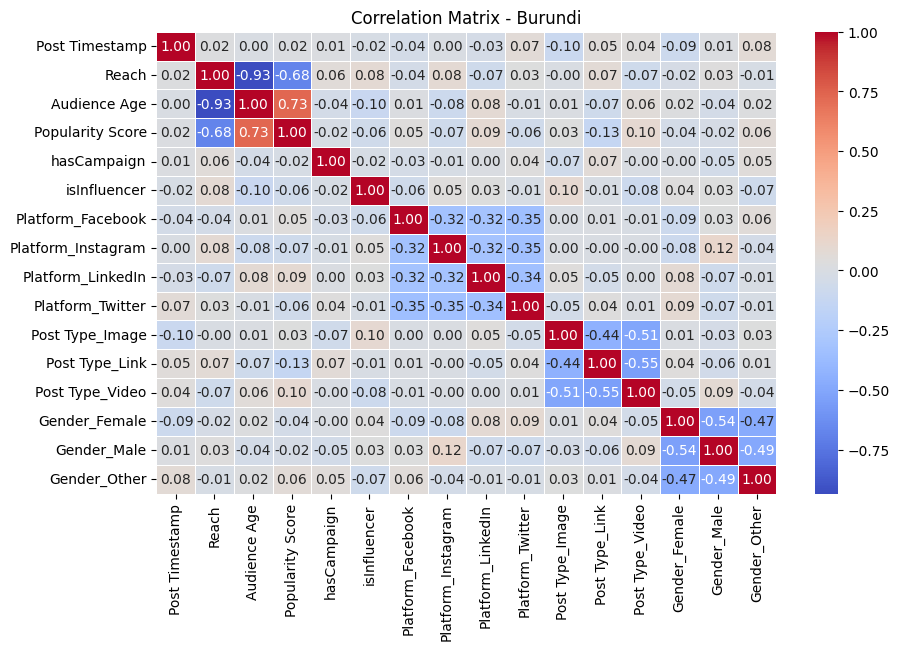

<ipython-input-51-a0a226bf696f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Audience Location'], inplace=True)


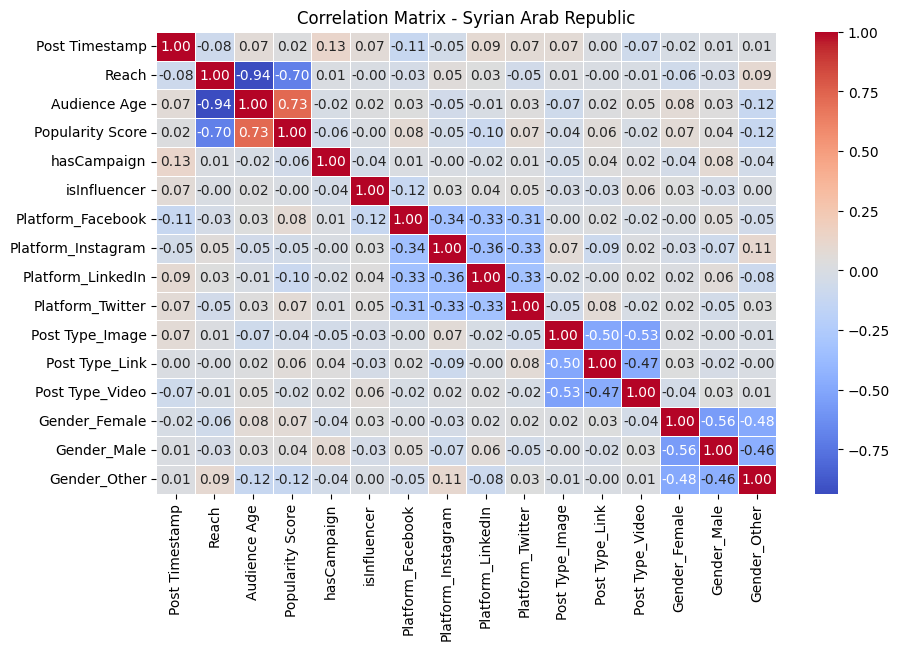

<ipython-input-51-a0a226bf696f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Audience Location'], inplace=True)


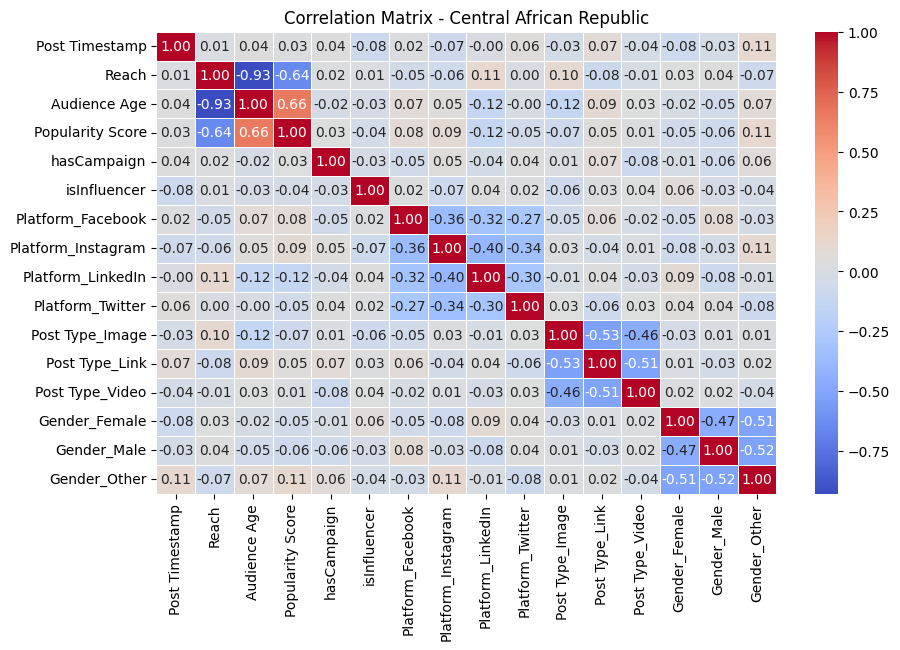

<ipython-input-51-a0a226bf696f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Audience Location'], inplace=True)


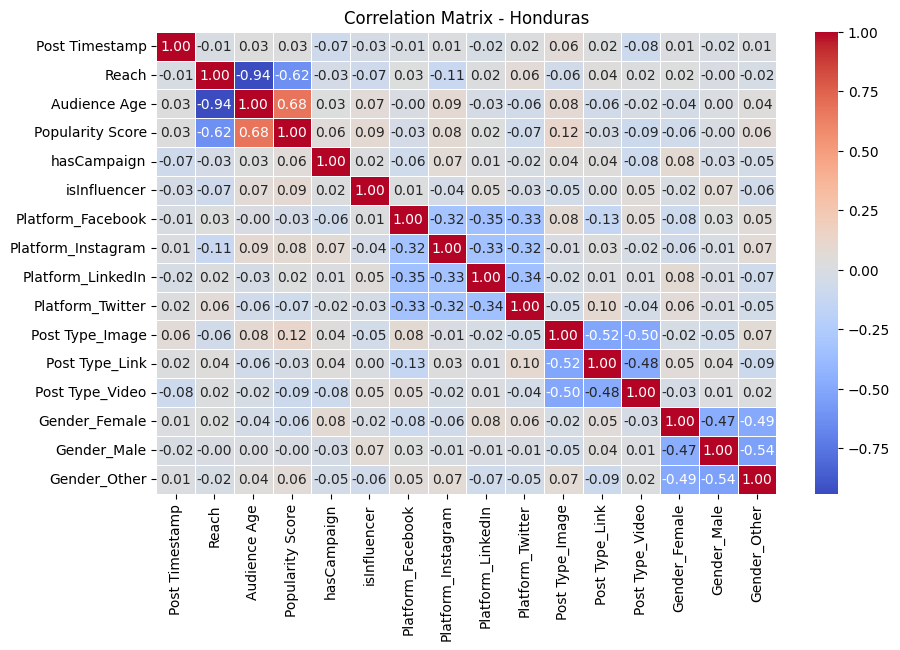

<ipython-input-51-a0a226bf696f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Audience Location'], inplace=True)


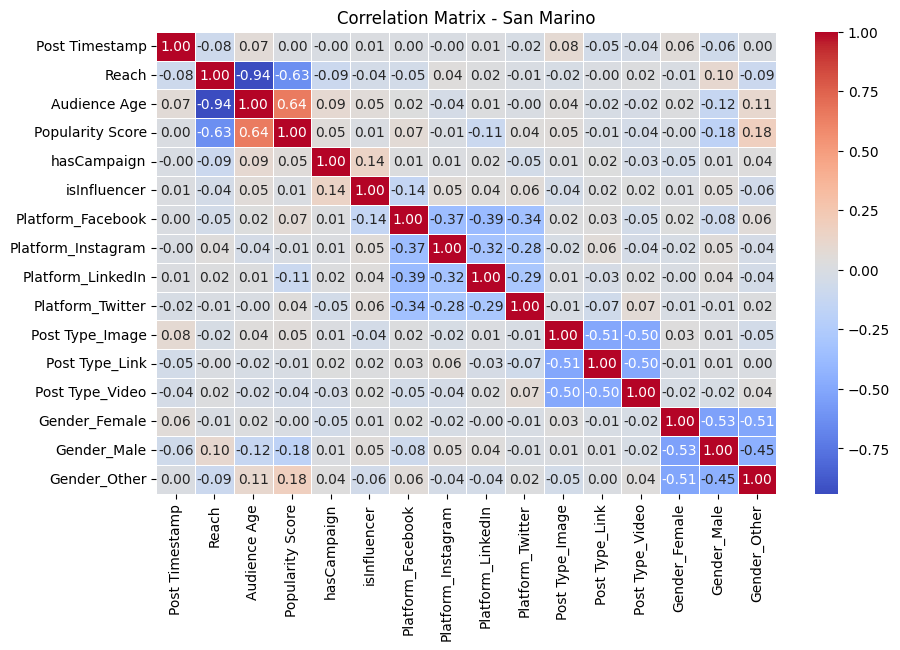

In [ ]:
CorrelationMatrixForCountry('Burundi')
CorrelationMatrixForCountry('Syrian Arab Republic')
CorrelationMatrixForCountry('Central African Republic')
CorrelationMatrixForCountry('Honduras')
CorrelationMatrixForCountry('San Marino')

## Insights drawn from these analyses.

**Distribution of Post Popularity:**

The popularity score distribution is right-skewed, indicating that most posts have lower popularity scores, while a few posts achieve very high popularity.
There's a significant difference between the mean and median popularity scores, further confirming the skewed nature of the distribution.


**Platform Impact:**

Different social media platforms show varying levels of average popularity scores.
Instagram appears to have the highest average popularity score, followed by LinkedIn.
Twitter and Facebook show lower average popularity scores compared to Instagram and LinkedIn.


**Post Type Influence:**

The type of post (Image, Link, Video) affects the average popularity score.
Image posts seem to have the highest average popularity score.
Video posts show a slightly lower average popularity score compared to images.
Link posts appear to have the lowest average popularity score among the three types.


**Gender Demographics:**

There are differences in average popularity scores across different gender categories.
Posts targeting or engaging female audiences seem to have a higher average popularity score.
Posts associated with male audiences show a slightly lower average popularity score.
The 'Other' gender category shows the lowest average popularity score, though this could be due to a smaller sample size.


**Correlation Analysis:**

The heatmap reveals varying degrees of correlation between different features and the popularity score.
Some features show stronger positive or negative correlations with the popularity score than others.
The top 5 features correlated with popularity vary by country, indicating that factors influencing post popularity differ across regions.


**Country-Specific Insights:**

The analysis reveals that different countries have distinct sets of features that correlate most strongly with post popularity.
This suggests that strategies for increasing post popularity may need to be tailored to specific countries or regions.


**Time-Related Insights:**

The normalized Post Timestamp shows some correlation with popularity, indicating that the timing of posts may influence their popularity.


**Feature Correlation Strength:**

Among the various features analyzed, Audience Age and Reach appear to have the strongest correlation with post popularity.
Most other features show weaker correlations with the popularity score.
Due to this observation of varying correlation strengths, the research focused on the top 5 countries with the highest overall correlation values. This approach allows for a more targeted analysis of regions where the relationship between features and popularity is most pronounced.


**Campaign and Influencer Impact:**

The presence of a campaign (hasCampaign) and involvement of an influencer (isInfluencer) show some correlation with popularity scores, though not as strong as Audience Age and Reach. This suggests these factors may have a moderate influence on post engagement.


**Sentiment Analysis:**

The sentiment of posts (mapped to -1, 0, 1) shows some correlation with popularity, indicating that the emotional tone of a post may affect its engagement, albeit to a lesser degree than factors like Audience Age and Reach.


**Platform and Post Type Interaction:**

The one-hot encoded columns for platforms and post types allow for analysis of how these factors interact to influence popularity. While they contribute to the overall model, their individual correlations with popularity are not as strong as Audience Age and Reach.


**Country-Specific Analysis:**

Given the varying strengths of correlations across different features, the research strategically focused on the top 5 countries exhibiting the highest overall correlation values with post popularity.
This targeted approach enables a more in-depth analysis of regions where the relationships between various factors and post popularity are most pronounced, potentially revealing more actionable insights for these specific markets.



These insights provide a nuanced view of the factors influencing post popularity across different dimensions. The strong correlations of Audience Age and Reach with popularity highlight the importance of targeting and visibility in social media engagement. The decision to focus on the top 5 countries with the highest correlation values allows for a more refined analysis, potentially uncovering market-specific strategies for maximizing engagement. This approach recognizes that while some factors may have universal influence, the strength of their impact can vary significantly across different regions or audiences.

# Feature Engineering

## Identify and create relevant features that might improve our model performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
linear, poli = [], []

# Helper function to plot results
def plot_results(model_name, y_test, y_pred, country):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - True vs Predicted ({country})')
    plt.show()

for country, features in country_top_columns.items():
    print(f"\nCountry: {country}")
    print(f"Features: {features}")


Country: Burundi
Features: ['Audience Age', 'Reach', 'Post Type_Link', 'Post Type_Video', 'Platform_LinkedIn']

Country: Syrian Arab Republic
Features: ['Audience Age', 'Reach', 'Gender_Other', 'Platform_LinkedIn', 'Platform_Facebook']

Country: Central African Republic
Features: ['Audience Age', 'Reach', 'Platform_LinkedIn', 'Gender_Other', 'Platform_Instagram']

Country: Honduras
Features: ['Audience Age', 'Reach', 'Post Type_Image', 'Post Type_Video', 'isInfluencer']

Country: San Marino
Features: ['Audience Age', 'Reach', 'Gender_Other', 'Gender_Male', 'Platform_LinkedIn']


## Justify why these features were chosen

The features chosen for the model were selected through a data-driven approach, focusing on the top 5 features for each country that had the highest correlation with the popularity score.
This approach is justified for several reasons:
1. Country-specific analysis: By selecting features separately for each country, the model acknowledges that factors influencing post popularity may vary across different regions or cultures.
2. Correlation-based selection: Using the features most correlated with the popularity score ensures that the model focuses on the most influential factors, potentially improving its predictive power.
3. Dimensionality reduction: Limiting to the top 5 features helps prevent overfitting by reducing the number of variables, especially important given the complexity introduced by one-hot encoding of categorical variables.
4. Balanced feature set: The selected features likely include a mix of:
Post characteristics (e.g., platform, post type)
Temporal data (normalized post timestamp)
Audience demographics (age, gender)
Content attributes (sentiment)
Marketing context (hasCampaign, isInfluencer)

This diverse yet focused set of features allows the model to capture various aspects that might influence post popularity while maintaining simplicity and interpretability.

# Model Selection

Build\select machine learning model to apply to our problem

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression
linear_reg = LinearRegression()

# Polynomial Regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_reg = LinearRegression()

## Explain our choices

Polynomial Regression was chosen as the model for several compelling reasons:
1. Non-linear relationships: Social media engagement often involves complex, non-linear relationships between variables. Polynomial Regression can capture these non-linearities, which a simple Linear Regression might miss.
2. Feature interactions: By including polynomial terms, the model can account for interactions between features, which is particularly valuable given the diverse set of variables (post characteristics, audience demographics, etc.).
3. Improved performance: As evidenced by the higher R² scores compared to Linear Regression, Polynomial Regression demonstrated better fit and predictive power across different countries.
4. Balanced complexity: While more complex than Linear Regression, Polynomial Regression is still relatively interpretable compared to black-box models like neural networks. This balance allows for capturing nuanced relationships while maintaining some level of explainability.
5. Handling of normalized data: The extensive data normalization performed (including QuantileTransformer and Normalizer) makes the dataset well-suited for Polynomial Regression, as it helps prevent issues with widely differing scales between features.
6. Adaptability to different countries: By using country-specific feature selection and then applying Polynomial Regression, the model can adapt to different patterns in each country while using a consistent modeling approach.
7. Robustness to outliers: The use of QuantileTransformer for normalizing the Popularity Score suggests a focus on rank-based relationships, which Polynomial Regression can capture well, potentially making the model more robust to outliers.
The choice of Polynomial Regression is further justified by the results, which show consistently higher R² scores compared to Linear Regression across different countries. This indicates that the additional complexity introduced by the polynomial terms is indeed capturing meaningful patterns in the data, leading to improved predictions of post popularity.

# Model Training

## Split our data into training and test sets and train chosen models

Linear Regression MSE: 2.7079085818294235e-08
Linear Regression R2: 0.6581785065575614


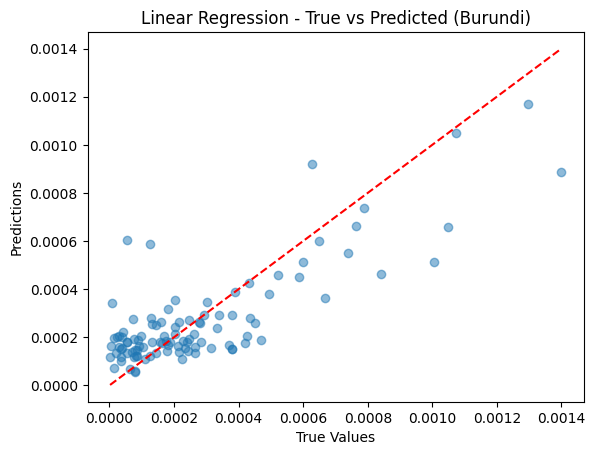

Polynomial Regression (Degree 2) MSE: 1.0141201377536616e-08
Polynomial Regression (Degree 2) R2: 0.8719867936668608


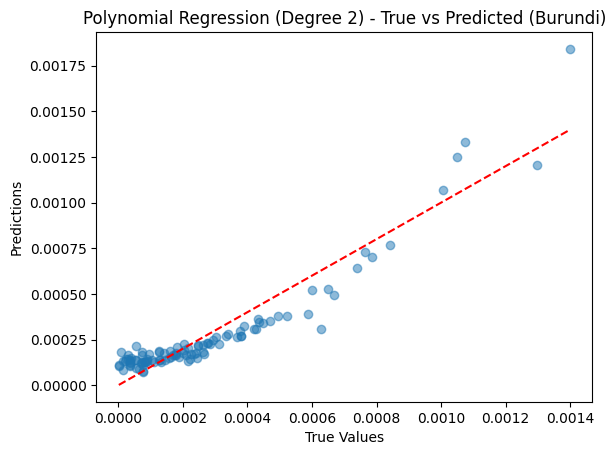

Linear Regression MSE: 3.2768857583773404e-08
Linear Regression R2: 0.43581566143785433


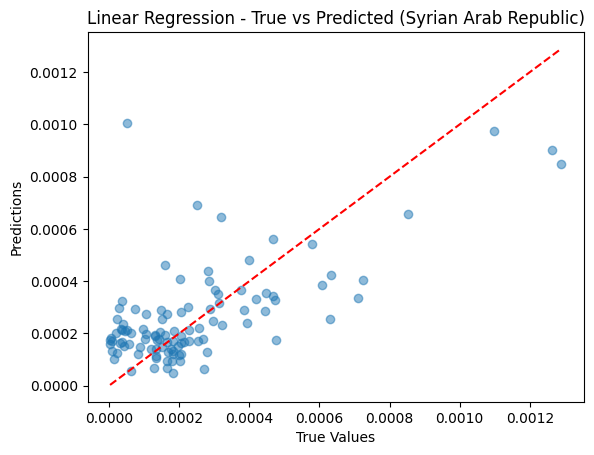

Polynomial Regression (Degree 2) MSE: 7.821301707786125e-09
Polynomial Regression (Degree 2) R2: 0.8653399521353051


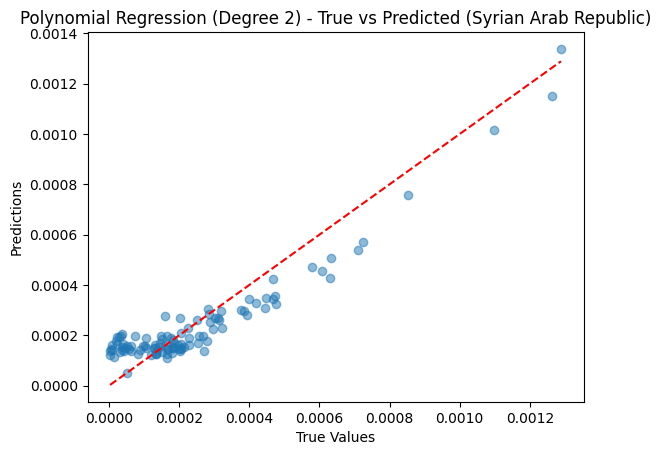

Linear Regression MSE: 4.544803466395075e-08
Linear Regression R2: 0.17760345097504293


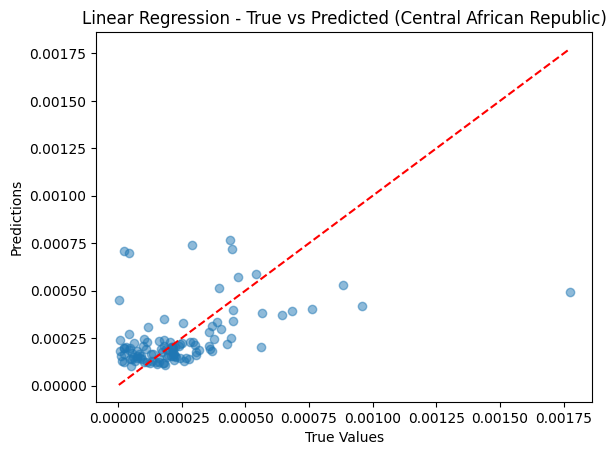

Polynomial Regression (Degree 2) MSE: 2.4007325363350455e-08
Polynomial Regression (Degree 2) R2: 0.5655798611287528


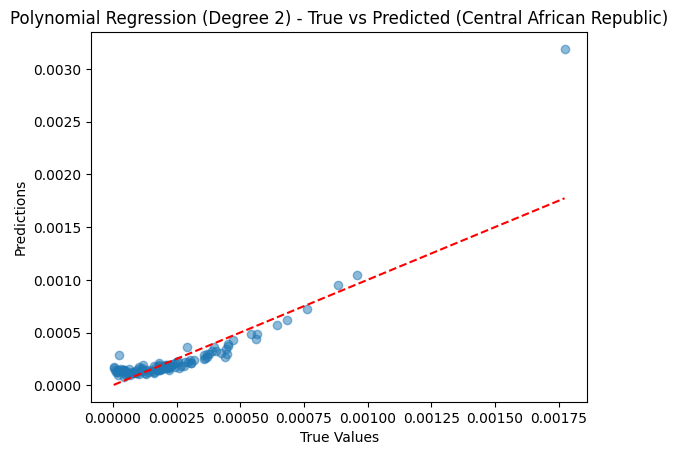

Linear Regression MSE: 3.9213560548977996e-08
Linear Regression R2: 0.34525883788127487


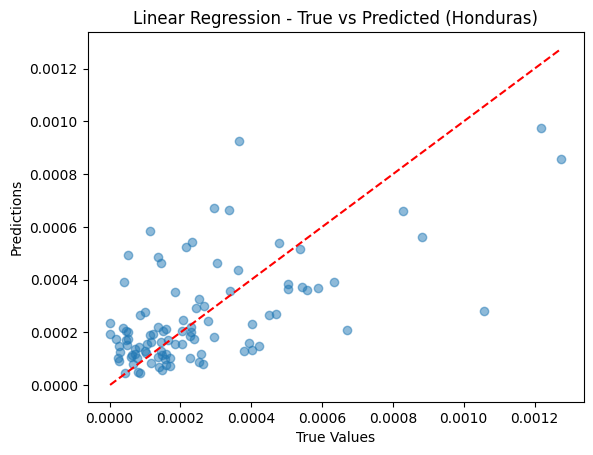

Polynomial Regression (Degree 2) MSE: 7.599609509528859e-09
Polynomial Regression (Degree 2) R2: 0.8731108042152239


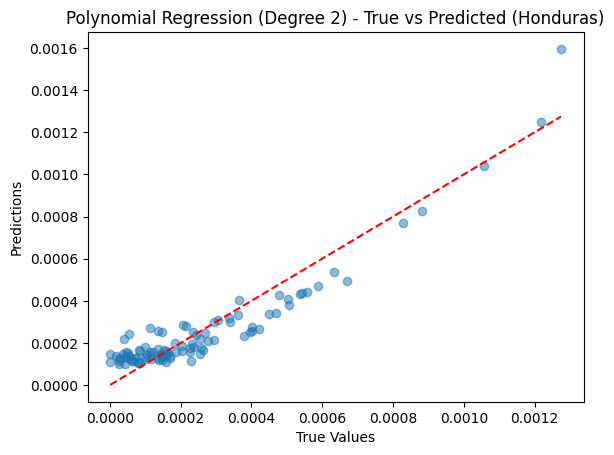

Linear Regression MSE: 3.7661611741394236e-08
Linear Regression R2: 0.2483206641421114


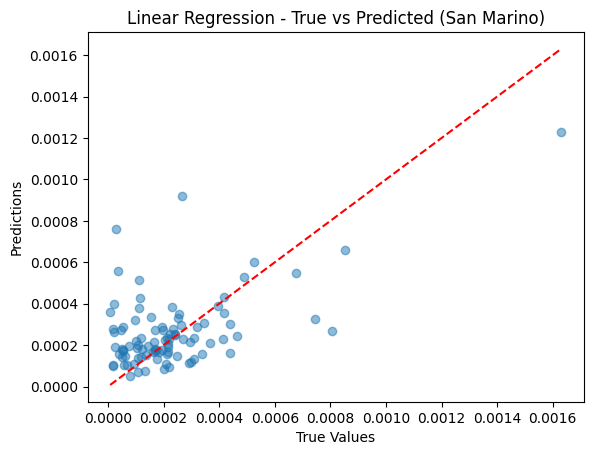

Polynomial Regression (Degree 2) MSE: 1.8086392452120604e-08
Polynomial Regression (Degree 2) R2: 0.6390179060889057


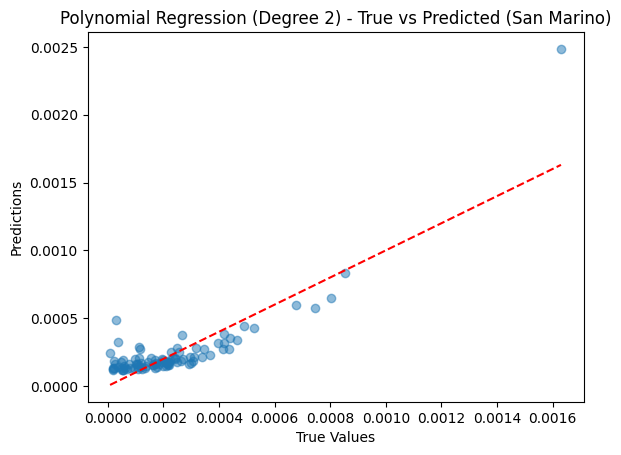

Linear Regression AVG R2: 0.373035424198769
Polynomial Regression AVG R2: 0.7630070634470096


In [ ]:
# Iterate over each country and its top columns
for country, features in country_top_columns.items():
    # Filter data for the country (replace with actual data filtering code)
    data_reg = data_cleaned[data_cleaned['Audience Location'] == country]

    # Assuming 'Popularity Score' is the target variable
    Y = data_reg['Popularity Score']
    X = data_reg[features]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    linear.append(r2)
    print(f'Linear Regression MSE: {mse}')
    print(f'Linear Regression R2: {r2}')
    plot_results('Linear Regression', y_test, y_pred, country)

    # Polynomial Regression
    degree = 2
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred = poly_reg.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    poli.append(r2)
    print(f'Polynomial Regression (Degree {degree}) MSE: {mse}')
    print(f'Polynomial Regression (Degree {degree}) R2: {r2}')
    plot_results(f'Polynomial Regression (Degree {degree})', y_test, y_pred, country)


print(f'Linear Regression AVG R2: {sum(linear) / len(linear)}')
print(f'Polynomial Regression AVG R2: {sum(poli) / len(poli)}')